<a href="https://colab.research.google.com/github/437-maral/Deap-Learning-/blob/main/autoconductors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9912422/9912422 [00:00<00:00, 102055587.11it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 83083466.27it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25832457.66it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12180644.99it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



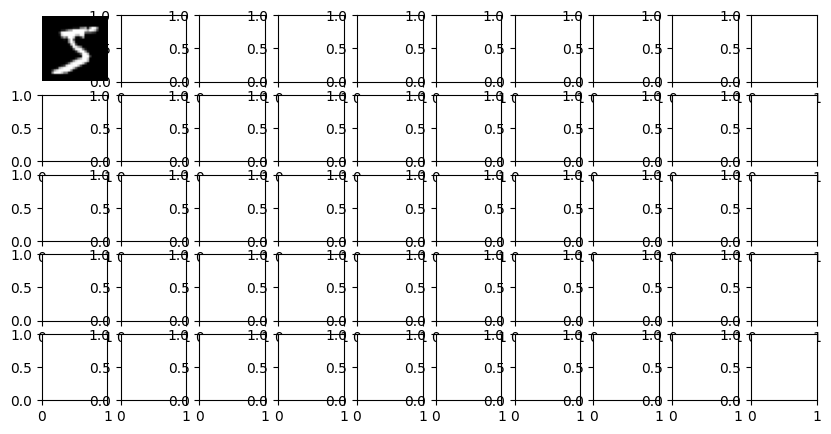

In [4]:
from torchvision.datasets import MNIST 
from torchvision import transforms as T 
import matplotlib.pyplot as plt
import torch
data_root = './data'
train_dataset = MNIST(data_root, train=True, download=True, transform=T.ToTensor()) \\\difference bteween traqin and test
test_dataset = MNIST(data_root, train=False, download=True, transform=T.ToTensor())
def show_samples(dataset): 
  h, w = 5, 10
  fig, ax = plt.subplots(h, w) 
  fig.set_size_inches((w, h)) 
  ax = ax.ravel()
  for i in range(h * w):
        img, label = dataset[i]
        ax[i].imshow(torch.permute(img, (1, 2, 0)), cmap='gray')
        ax[i].axis('off')
        plt.show()
show_samples(train_dataset)

In [6]:
from torch.utils.data import DataLoader 
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [ ]:
def get_objective_term(x, V, W, b, a):
  z=torch.max(torch.zeros(V.shape[1]),torch.mm(V,x)+b))###zuero must be the sam
  x_bar=torch.mm(W,z)+a
  result=torch.sum((x-x_bar)**2))
return result/x.shape(0)
 

In [ ]:
import torch.optim
import torch.nn
from tqdm.auto import tqdm
from dataclasses import dataclass
@dataclass
class Autoencoder:
    V: torch.nn.Parameter
    W: torch.nn.Parameter
    b: torch.nn.Parameter
    a: torch.nn.Parameter
def params(self):
return {'V': self.V, 'W': self.W, 'b': self.b, 'a': self.a}
def train(loader, h=32, epochs=5):
torch.manual_seed(0)
d = 28 * 28
V = torch.nn.Parameter(d ** -.5 * torch.randn([d, h])) W = torch.nn.Parameter(torch.zeros([h, d]))
b = torch.nn.Parameter(torch.zeros([h]))
a = torch.nn.Parameter(torch.zeros([d]))
optimizer = torch.optim.Adam((V, W, b, a), lr=0.0001) for epoch in range(epochs):
for x, _ in loader:
optimizer.zero_grad()
x = x.reshape((-1, 28 * 28))
loss = get_objective_term(x, V, W, b, a) loss.backward()
optimizer.step()
print('Epoch %3d %8.2f' % (epoch, loss.data)) return Autoencoder(V=V, W=W, b=b, a=a)

In [ ]:
def reconstruct(x, V, W, b, a):
z = torch.max(torch.zeros(V.shape[1]),torch.mm(x, V) + b) 
x_rec = torch.mm(z, W) + a
return x_rec.reshape(x.shape[0], 28, 28)

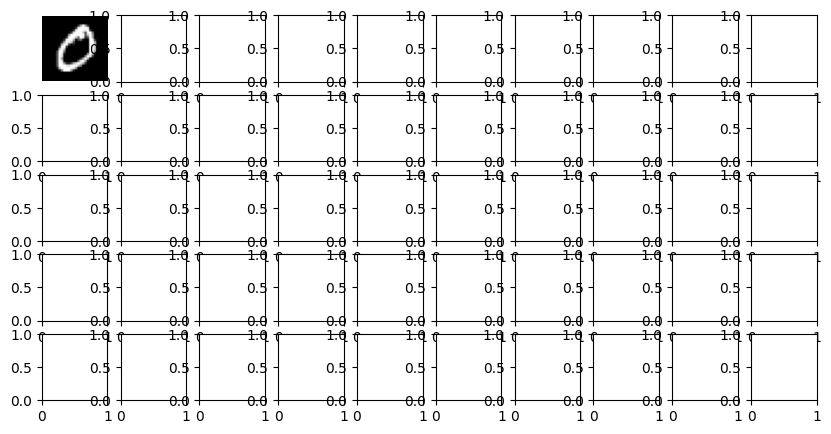

In [8]:
import copy
from torch.utils.data import Subset 
import numpy as np
# Our training dataset only contains zeros.
normal_class = 0
one_class_train = Subset(dataset=copy.deepcopy(train_dataset), indices=np.where(train_dataset.
targets == normal_class)[0])
show_samples(one_class_train)

In [ ]:

def anomaly_score(x, reconstruction):
  anomaly_score=((reconstruction - x) ** 2).sum(axis=-1)##return an array that holds an anomaly score for each sample of the batch.
return anomaly_score

In [ ]:
def compute_anomaly_scores(test_loader, V, W, b, a): anomaly_scores = []
labels = []
for x, y in test_loader:
x = x.reshape(x.shape[0], 28 * 28)
reconstruction = reconstruct(x, **anomaly_ae.params()).detach()
batch_anomaly_scores = anomaly_score(x, reconstruction.reshape(x.shape[0], 28 * 28)) # label 0 if sample is normal, otherwise 1
batch_labels = (y != normal_class).numpy() anomaly_scores.append(batch_anomaly_scores)
labels.append(batch_labels)
anomaly_scores = np.concatenate(anomaly_scores) labels = np.concatenate(labels)
return anomaly_scores, labels
             test_loader = DataLoader(test_dataset, batch_size=64)
             anomaly_scores, labels = compute_anomaly_scores(test_loader, **anomaly_ae.params())
             score = roc_auc_score(labels, anomaly_scores)
print('AUC:', score)
for name, label in [('anomalies', 1), ('normal', 0)]:
                 plt.hist(anomaly_scores[labels == label], bins=30, label=name)
             plt.ylabel('Occurence')
             plt.xlabel('Anomaly Score')
             plt.legend()